## DSTA

### Rating and Ranking with Massey's and Keener's Methods:

### The Premier League case

This is the __exercise__ notebook.

We will analyse Premier League results for these two interesting seasons; results have been downloaded from [www.footballwebpages.co.uk](https://www.footballwebpages.co.uk/premier-league):

- the [2021 - 2022 season](https://www.footballwebpages.co.uk/premier-league/match-grid/2021-2022), and
- [2022 - 2023 season](https://www.footballwebpages.co.uk/premier-league/match-grid/2022-2023).




## Import necessary Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Set pandas and numpy options for printing results

In [2]:
np.set_printoptions(linewidth=1000)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

#### Premier League winners:

*   **2021 - 2022**: Manchester City (1-point gap from Liverpool that finished second)

*   **2022 - 2023**: Manchester City (5-points gap from Arsenal that finished second)



## File names

In [3]:
# League table files
premier_league_table_2017_2018 = "./data/2017_2018_LeagueTable.csv"
premier_league_table_2018_2019 = "./data/2018_2019_LeagueTable.csv"
premier_league_table_2019_2020 = "./data/2019_2020_LeagueTable.csv"
premier_league_table_2020_2021 = "./data/2020_2021_LeagueTable.csv"
premier_league_table_2021_2022 = "./data/2021_2022_LeagueTable.csv"
premier_league_table_2022_2023 = "./data/2022_2023_LeagueTable.csv"

# Match grid files
premier_league_match_grid_2017_2018 = "./data/2017_2018_MatchGrid.csv"
premier_league_match_grid_2018_2019 = "./data/2018_2019_MatchGrid.csv"
premier_league_match_grid_2019_2020 = "./data/2017_2018_MatchGrid.csv"
premier_league_match_grid_2020_2021 = "./data/2020_2021_MatchGrid.csv"
premier_league_match_grid_2021_2022 = "./data/2021_2022_MatchGrid.csv"
premier_league_match_grid_2022_2023 = "./data/2022_2023_MatchGrid.csv"

## Set current working data files and next season files

Hint: Change these variables in case you would like to rate / rank teams based on a different season and check the estimates against the actual rankings of the following season.

In [4]:
# Current (working) season
current_league_table_file = premier_league_table_2021_2022

current_match_grid_file = premier_league_match_grid_2021_2022

current_season = "2021 - 2022"

# Next season
coming_league_table_file = premier_league_table_2022_2023

coming_match_grid_file = premier_league_match_grid_2022_2023

coming_season = "2022 - 2023"

### 1 Massey from Premiership league table





### Import the league table of the "current" season

In [5]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)

league_table["Actual_Ranking"] = np.arange(1, 21)

league_table

Unnamed: 0        Unnamed: 1          P   W  D   L  P.1  W.1  D.1  L.1  P.2  W.2  D.2  L.2   F   A  +/-  Pts  Actual_Ranking
0       C              Manchester City  19  15  2   2  19   14    4    1   38   29    6    3   99  26  73   93          1      
1       2                    Liverpool  19  15  4   0  19   13    4    2   38   28    8    2   94  26  68   92          2      
2       3                      Chelsea  19   9  7   3  19   12    4    3   38   21   11    6   76  33  43   74          3      
3       4            Tottenham Hotspur  19  13  1   5  19    9    4    6   38   22    5   11   69  40  29   71          4      
4       5                      Arsenal  19  13  2   4  19    9    1    9   38   22    3   13   61  48  13   69          5      
5       6            Manchester United  19  10  5   4  19    6    5    8   38   16   10   12   57  57   0   58          6      
6       7              West Ham United  19   9  5   5  19    7    3    9   38   16    8   14   60  51   9   56          7      
7       8               Leicester City  19  10  4   5  19    4    6    9   38   14   10   14   62  59   3   52          8      
8       9       Brighton & Hove Albion  19   5  7   7  19    7    8    4   38   12   15   11   42  44  -2   51          9      
9      10      Wolverhampton Wanderers  19   7  3   9  19    8    3    8   38   15    6   17   38  43  -5   51         10      
10     11             Newcastle United  19   8  6   5  19    5    4   10   38   13   10   15   44  62 -18   49         11      
11     12               Crystal Palace  19   7  8   4  19    4    7    8   38   11   15   12   50  46   4   48         12      
12     13                    Brentford  19   7  3   9  19    6    4    9   38   13    7   18   48  56  -8   46         13      
13     14                  Aston Villa  19   6  5   8  19    7    1   11   38   13    6   19   52  54  -2   45         14      
14     15                  Southampton  19   6  7   6  19    3    6   10   38    9   13   16   43  67 -24   40         15      
15     16                      Everton  19   9  2   8  19    2    4   13   38   11    6   21   43  66 -23   39         16      
16     17                 Leeds United  19   4  6   9  19    5    5    9   38    9   11   18   42  79 -37   38         17      
17      R                      Burnley  19   5  6   8  19    2    8    9   38    7   14   17   34  53 -19   35         18      
18      R                      Watford  19   2  2  15  19    4    3   12   38    6    5   27   34  77 -43   23         19      
19      R                 Norwich City  19   3  3  13  19    2    4   13   38    5    7   26   23  84 -61   22         20

### Keep columns about goals scored and rename for clarity

In [6]:
required_cols = ["Unnamed: 1", "P.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]

renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

league_table

Teams            Total_Matches_Played  Goals_Scored  Goals_Conceded  Goal_Difference  Points  Actual_Ranking
0           Manchester City           38                99             26              73           93           1      
1                 Liverpool           38                94             26              68           92           2      
2                   Chelsea           38                76             33              43           74           3      
3         Tottenham Hotspur           38                69             40              29           71           4      
4                   Arsenal           38                61             48              13           69           5      
5         Manchester United           38                57             57               0           58           6      
6           West Ham United           38                60             51               9           56           7      
7            Leicester City           38                62             59               3           52           8      
8    Brighton & Hove Albion           38                42             44              -2           51           9      
9   Wolverhampton Wanderers           38                38             43              -5           51          10      
10         Newcastle United           38                44             62             -18           49          11      
11           Crystal Palace           38                50             46               4           48          12      
12                Brentford           38                48             56              -8           46          13      
13              Aston Villa           38                52             54              -2           45          14      
14              Southampton           38                43             67             -24           40          15      
15                  Everton           38                43             66             -23           39          16      
16             Leeds United           38                42             79             -37           38          17      
17                  Burnley           38                34             53             -19           35          18      
18                  Watford           38                34             77             -43           23          19      
19             Norwich City           38                23             84             -61           22          20

### Create M and p matrices of Massey's method

Below a refresher of the relevant formulas



$\mathbf{Mr} = \mathbf{p}$

Massey Matrix - last row elements set to 1:

$\mathbf{M}_{n \times n} = \begin{pmatrix}
  38 & -2 & -2 & \dots & -2\\
  -2 & 38 & -2 & \dots & -2\\
  -2 & -2 & 38 & \dots & -2\\
  \vdots & \vdots & \vdots & \ddots & -2\\
  1 & 1 & 1 & \dots & 1
  \end{pmatrix}$

The *Goal Difference Column Vector:*

$\mathbf{p}_{n \times 1} = \begin{pmatrix}
p_1\\
p_2\\
p_3\\
\vdots \\
p_n
\end{pmatrix}$


Looking for the Ratings Vector:


$\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$


Solution:

$\mathbf{r} = \mathbf{M}^{-1} \mathbf{p}$

In [7]:
# Useful constants
N_TEAMS = len(league_table)

MATCHES_PLAYED_PER_TEAM = 2 * (N_TEAMS - 1)

# Create M matrix: non-diagonal elements are the negated number of matches
# played between each pair of teams. Diagonal elements are the total matches
# played per team (both home and away).
M = -2 * np.ones((N_TEAMS, N_TEAMS))

diagonal = np.ones((1, N_TEAMS)) * MATCHES_PLAYED_PER_TEAM

last_row = np.ones((1, N_TEAMS))

M[-1:] = last_row

np.fill_diagonal(M, diagonal)

# Create p column vector with goal difference. Shape: (N_TEAMS, 1)
p = league_table["Goal_Difference"].to_numpy().reshape((-1, 1))

### Solve the system and calculate Massey rankings and ratings - use MinMaxScaler for easier plotting of ratings further below

Please see the relative [sklearn MinMaxScaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [8]:
# Solve the equation system to calculate ratings and add them to the data
r = np.linalg.inv(M).dot(p)

league_table["Massey_Rating"] = r

# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
league_table["Scaled_Massey_Rating"] = min_max_scaler.fit_transform(
    league_table.loc[:, "Massey_Rating"].to_numpy().reshape(-1, 1)
)

# Sort the data by calculated ratings and get Massey ranking
league_table = league_table.sort_values("Massey_Rating", ascending=False)
league_table["Massey_Ranking"] = np.arange(1, 21)

In [11]:
M

array([[38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -2., -2., -2., -2., -2., -2., 38., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2., -2.],
       [-2., -2., -

#### Keep a data copy to compile ratings and rankings from all methods

In [9]:
compiled_results = (
    league_table
    .sort_values("Actual_Ranking", ascending=True)
    .copy()
    )

In [10]:
# Run this if you would like to check the "compiled_results"
compiled_results

Teams            Total_Matches_Played  Goals_Scored  Goals_Conceded  Goal_Difference  Points  Actual_Ranking  Massey_Rating  Scaled_Massey_Rating  Massey_Ranking
0           Manchester City           38                99             26              73           93           1          1.744737          100.000000              1      
1                 Liverpool           38                94             26              68           92           2          1.619737           96.268657              2      
2                   Chelsea           38                76             33              43           74           3          0.994737           77.611940              3      
3         Tottenham Hotspur           38                69             40              29           71           4          0.644737           67.164179              4      
4                   Arsenal           38                61             48              13           69           5          0.244737           55.223881              5      
5         Manchester United           38                57             57               0           58           6         -0.080263           45.522388              9      
6           West Ham United           38                60             51               9           56           7          0.144737           52.238806              6      
7            Leicester City           38                62             59               3           52           8         -0.005263           47.761194              8      
8    Brighton & Hove Albion           38                42             44              -2           51           9         -0.130263           44.029851             10      
9   Wolverhampton Wanderers           38                38             43              -5           51          10         -0.205263           41.791045             12      
10         Newcastle United           38                44             62             -18           49          11         -0.530263           32.089552             14      
11           Crystal Palace           38                50             46               4           48          12          0.019737           48.507463              7      
12                Brentford           38                48             56              -8           46          13         -0.280263           39.552239             13      
13              Aston Villa           38                52             54              -2           45          14         -0.130263           44.029851             11      
14              Southampton           38                43             67             -24           40          15         -0.680263           27.611940             17      
15                  Everton           38                43             66             -23           39          16         -0.655263           28.358209             16      
16             Leeds United           38                42             79             -37           38          17         -1.005263           17.910448             18      
17                  Burnley           38                34             53             -19           35          18         -0.555263           31.343284             15      
18                  Watford           38                34             77             -43           23          19         -1.155263           13.432836             19      
19             Norwich City           38                23             84             -61           22          20         -1.605263            0.000000             20

### Plot Massey scaled rating and ranking side by side with actual ranking and points scored

Documentation for [matplotlib.pyplot horizontal bar plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html)

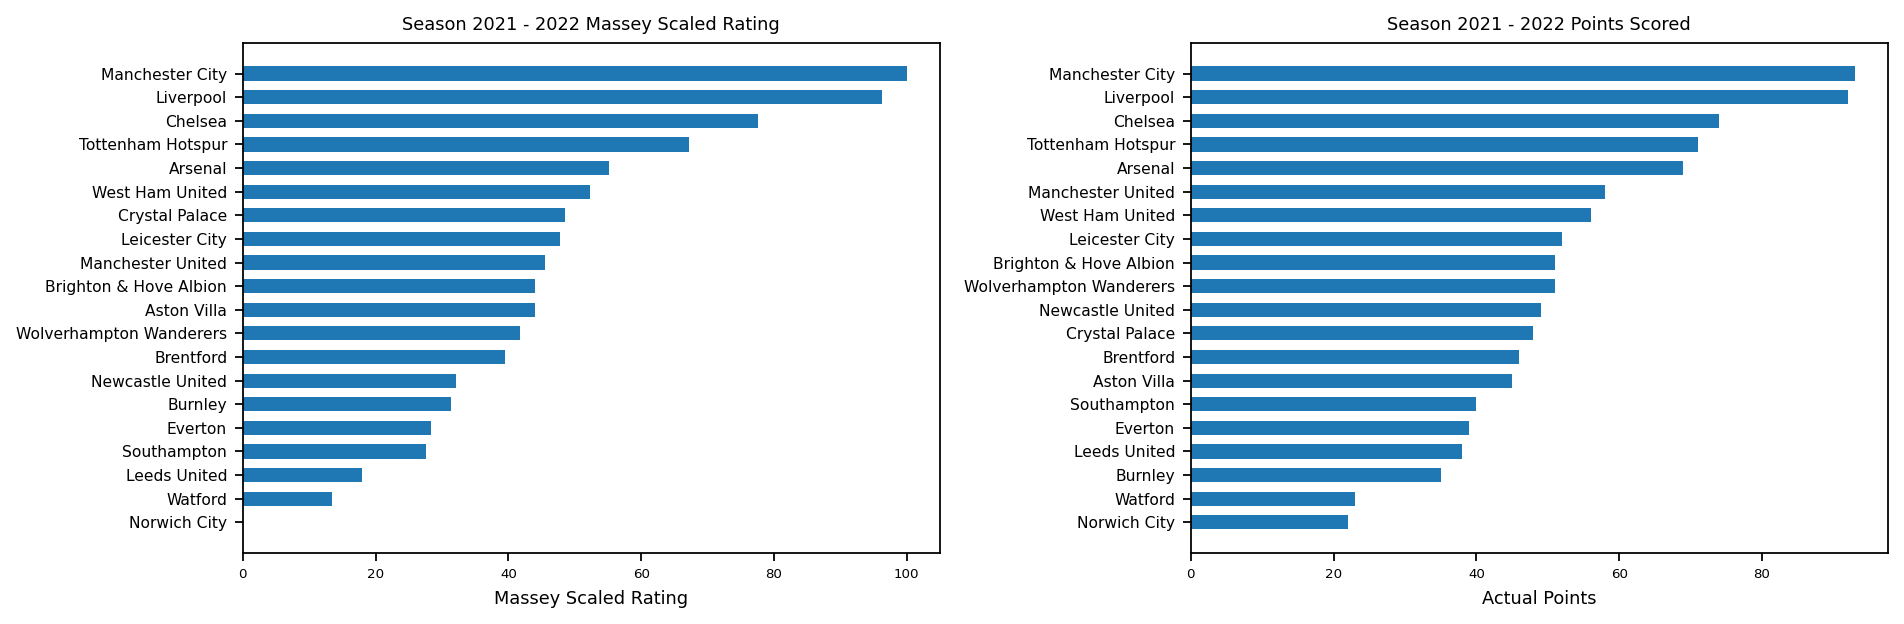

In [12]:
# Initialize grid of plots
_, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Massey scaled rating - plot 0, row 0
axis[0].barh(
    league_table["Massey_Ranking"], 
    league_table["Scaled_Massey_Rating"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    league_table["Massey_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Massey Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Massey Scaled Rating', fontsize=8)

# Plot actual ranking and points scored - plot 1, row 0
axis[1].barh(
    league_table["Actual_Ranking"], 
    league_table["Points"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    league_table["Actual_Ranking"], 
    labels=league_table["Teams"],
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

### Keener's method

#### For Keener, we need the match grid

In [13]:
# Each match entry is in the format ="GH-GA" (except from NaN in diagonal).
# GH are goals scored by the home team, and GA are goals scored by the away team
# Below, we read the match grid CSV and remove '=' and '"'
match_grid = (
    pd.read_csv(current_match_grid_file, dtype=str, index_col=0)
    .replace('"' , '', regex=True)
    .replace('=' , '', regex=True)
    .fillna("0-0")
    )

# Save all teams as a list
teams = match_grid.columns.to_list()
match_grid

Arsenal Aston Villa Brentford Brighton & Hove Albion Burnley Chelsea Crystal Palace Everton Leeds United Leicester City Liverpool Manchester City Manchester United Newcastle United Norwich City Southampton Tottenham Hotspur Watford West Ham United Wolverhampton Wanderers
Arsenal                    0-0       3-1        2-1             1-2             0-0     0-2        2-2         5-1       2-1           2-0          0-2          1-2              3-1              2-0            1-0          3-0            3-1          1-0         2-0                 2-1         
Aston Villa                0-1       0-0        1-1             2-0             1-1     1-3        1-1         3-0       3-3           2-1          1-2          1-2              2-2              2-0            2-0          4-0            0-4          0-1         1-4                 2-3         
Brentford                  2-0       2-1        0-0             0-1             2-0     0-1        0-0         1-0       1-2           1-2          3-3          0-1              1-3              0-2            1-2          3-0            0-0          2-1         2-0                 1-2         
Brighton & Hove Albion     0-0       0-2        2-0             0-0             0-3     1-1        1-1         0-2       0-0           2-1          0-2          1-4              4-0              1-1            0-0          2-2            0-2          2-0         3-1                 0-1         
Burnley                    0-1       1-3        3-1             1-2             0-0     0-4        3-3         3-2       1-1           0-2          0-1          0-2              1-1              1-2            0-0          2-0            1-0          0-0         0-0                 1-0         
Chelsea                    2-4       3-0        1-4             1-1             1-1     0-0        3-0         1-1       3-2           1-1          2-2          0-1              1-1              1-0            7-0          3-1            2-0          2-1         1-0                 2-2         
Crystal Palace             3-0       1-2        0-0             1-1             1-1     0-1        0-0         3-1       0-0           2-2          1-3          0-0              1-0              1-1            3-0          2-2            3-0          1-0         2-3                 2-0         
Everton                    2-1       0-1        2-3             2-3             3-1     1-0        3-2         0-0       3-0           1-1          1-4          0-1              1-0              1-0            2-0          3-1            0-0          2-5         0-1                 0-1         
Leeds United               1-4       0-3        2-2             1-1             3-1     0-3        1-0         2-2       0-0           1-1          0-3          0-4              2-4              0-1            2-1          1-1            0-4          1-0         1-2                 1-1         
Leicester City             0-2       0-0        2-1             1-1             2-2     0-3        2-1         1-2       1-0           0-0          1-0          0-1              4-2              4-0            3-0          4-1            2-3          4-2         2-2                 1-0         
Liverpool                  4-0       1-0        3-0             2-2             2-0     1-1        3-0         2-0       6-0           2-0          0-0          2-2              4-0              3-1            3-1          4-0            1-1          2-0         1-0                 3-1         
Manchester City            5-0       3-2        2-0             3-0             2-0     1-0        0-2         3-0       7-0           6-3          2-2          0-0              4-1              5-0            5-0          0-0            2-3          5-1         2-1                 1-0         
Manchester United          3-2       0-1        3-0             2-0             3-1     1-1        1-0         1-1       5-1           1-1          0-5          0-2            

#### Create Keener's S matrix

Below is a refresher of the method:

$S_{n \times n} \text{ where } S_{ij} \text{: total goals scored from team } i \text{ against team } j$; here *n* represents the total number of teams in the league.

### Exercise 1: Complete the code to calculate Keener's S matrix

#### Step-by-step:

1.   Parse scores. Example: "3-2". The home team scored 3 goals and the away team 2.

   Hint: Pandas [applymap documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html)

2.   Match every team's home match with the respective away match against the same opponent.

   Hint: The home match of team *i* against *j* is element *ij*. The respective away match is element *ji* - row and column indexes are swapped...

In [14]:
# TODO: Write your code below. Save the output in variable S_dataframe

# Parse score and get goals of a home match
home_goals_ij = lambda score: int(score.split("-")[0])
all_home_goals_ij = match_grid.map(home_goals_ij)

# Parse score and get goals of an away match
away_goals_ij = lambda score: int(score.split("-")[1])
all_away_goals_ij = match_grid.map(away_goals_ij)

# The grid is transposed to match every team's respective
# home and away matches

# Sum goals scored
S_dataframe = all_home_goals_ij + all_away_goals_ij

In [15]:
S_dataframe

Arsenal  Aston Villa  Brentford  Brighton & Hove Albion  Burnley  Chelsea  Crystal Palace  Everton  Leeds United  Leicester City  Liverpool  Manchester City  Manchester United  Newcastle United  Norwich City  Southampton  Tottenham Hotspur  Watford  West Ham United  Wolverhampton Wanderers
Arsenal                     0          4           3                 3               0        2            4           6           3              2            2             3                 4                  2               1            3               4             1            2                    3           
Aston Villa                 1          0           2                 2               2        4            2           3           6              3            3             3                 4                  2               2            4               4             1            5                    5           
Brentford                   2          3           0                 1               2        1            0           1           3              3            6             1                 4                  2               3            3               0             3            2                    3           
Brighton & Hove Albion      0          2           2                 0               3        2            2           2           0              3            2             5                 4                  2               0            4               2             2            4                    1           
Burnley                     1          4           4                 3               0        4            6           5           2              2            1             2                 2                  3               0            2               1             0            0                    1           
Chelsea                     6          3           5                 2               2        0            3           2           5              2            4             1                 2                  1               7            4               2             3            1                    4           
Crystal Palace              3          3           0                 2               2        1            0           4           0              4            4             0                 1                  2               3            4               3             1            5                    2           
Everton                     3          1           5                 5               4        1            5           0           3              2            5             1                 1                  1               2            4               0             7            1                    1           
Leeds United                5          3           4                 2               4        3            1           4           0              2            3             4                 6                  1               3            2               4             1            3                    2           
Leicester City              2          0           3                 2               4        3            3           3           1              0            1             1                 6                  4               3            5               5             6            4                    1           
Liverpool                   4          1           3                 4               2        2            3           2           6              2            0             4                 4                  4               4            4               2             2            1                    4           
Manchester City             5          5           2                 3               2        1            2           3           7              9            4             0                 5                  5               5      

### Create Keener A matrix

Below a refresher

$\mathbf{A}_{n \times n} = \left[\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right]_{n \times n}$
<br>
<br>
$\mathbf{A}_{n \times n} = [a_{ij}] = \left[h\left(\frac{S_{ij}+ 1}{S_{ij} + S_{ji} + 2}\right)\right]_{n \times n}$
<br>
<br>
$\text{where } h(x) = \frac{1}{2} + \frac{sgn\{x - (1/2)\}\sqrt{|2x - 1|}}{2}$

### Exercise 2: Complete the code (check 'TODO' comments) to get matrix A

#### Calculate the Numerator

In [16]:
# TODO: Start by creating the numerator (forget about skewing for now)
# Save output as A_numerator

A_numerator = S_dataframe.copy().to_numpy() + 1

A_numerator

array([[ 1,  5,  4,  4,  1,  3,  5,  7,  4,  3,  3,  4,  5,  3,  2,  4,  5,  2,  3,  4],
       [ 2,  1,  3,  3,  3,  5,  3,  4,  7,  4,  4,  4,  5,  3,  3,  5,  5,  2,  6,  6],
       [ 3,  4,  1,  2,  3,  2,  1,  2,  4,  4,  7,  2,  5,  3,  4,  4,  1,  4,  3,  4],
       [ 1,  3,  3,  1,  4,  3,  3,  3,  1,  4,  3,  6,  5,  3,  1,  5,  3,  3,  5,  2],
       [ 2,  5,  5,  4,  1,  5,  7,  6,  3,  3,  2,  3,  3,  4,  1,  3,  2,  1,  1,  2],
       [ 7,  4,  6,  3,  3,  1,  4,  3,  6,  3,  5,  2,  3,  2,  8,  5,  3,  4,  2,  5],
       [ 4,  4,  1,  3,  3,  2,  1,  5,  1,  5,  5,  1,  2,  3,  4,  5,  4,  2,  6,  3],
       [ 4,  2,  6,  6,  5,  2,  6,  1,  4,  3,  6,  2,  2,  2,  3,  5,  1,  8,  2,  2],
       [ 6,  4,  5,  3,  5,  4,  2,  5,  1,  3,  4,  5,  7,  2,  4,  3,  5,  2,  4,  3],
       [ 3,  1,  4,  3,  5,  4,  4,  4,  2,  1,  2,  2,  7,  5,  4,  6,  6,  7,  5,  2],
       [ 5,  2,  4,  5,  3,  3,  4,  3,  7,  3,  1,  5,  5,  5,  5,  5,  3,  3,  2,  5],
       [ 6,  6,  3,  

### Calculate the Denominator

In [ ]:
# TODO: Create the denominator (forget about skewing for now)
# Save output as A_denominator
# Hint: We are trying to add symmetric elements - elements with reversed indexes
# Example: Sij + Sji (row becomes column, column becomes row)


### Calculate A

In [ ]:
# TODO: Write your code below
# Divide A_numerator by A_denominator and save as A


### Apply skewing to A

Please see the Numpy [vectorize documentation](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html) and [Generalized Universal Function API documentation](https://numpy.org/doc/stable/reference/c-api/generalized-ufuncs.html).

In [ ]:
def skewing_function(x: float) -> float:
    """
    Function proposed by Keener to skew the data of
    matrix A calculated above.

    :parameter x: A single entry of matrix A.

    :return: The transformed entry passed through the skewing function
    """
    numerator = np.sign(x - 0.5) * np.sqrt(np.abs(2 * x - 1))
    return 0.5 + numerator / 2

# Vectorize the skewing function for appying it to a numpy array
ufunc_skewing_function = np.vectorize(skewing_function)
A = ufunc_skewing_function(A)

# Uncomment if you want to inspect the final A matrix
# A

## Calculate Eigenvalues and Eigenvectors

Numpy [documentation on eigenvalues and eigenvectors](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html)

$\mathbf{A} \mathbf{r} = Î» \mathbf{r}, \mathbf{r} > 0 \text{ and } \sum_{j=1}^{n}r_j = 1$


$\lambda:$ Perron's value (the *dominant* eigenvalue)

$\mathbf{r:}$ Perron vector (dominant eigenvector)


Looking for the Ratings Vector:

$\\\mathbf{r}_{n \times 1} = \begin{pmatrix}
r_1\\
r_2\\
r_3\\
\vdots \\
r_n
\end{pmatrix}$

### Exercise 3: Compute eigenvalues and eigenvectors of A and pick the largest eigenvalue

In [ ]:
# TODO: Write your code here


#### A crucial condition: the dominant eigenvalue must be a real number: its imaginary part must be 0.

#### Save the Perron value as a float

In [ ]:
perron_value = float(eigenvals[max_eigenvalue_index])
print(f"Perron value: {perron_value}")

#### Also the dominant eigenvector must be real: all entries must have imaginary part 0.

In [ ]:
eigenvecs[: , max_eigenvalue_index].reshape(-1, 1)

#### Save the real part of the dominant eigenvector entries

This is not the Perron vector yet (we could get all entries as negatives).

We use the *Brute Force* technique described in Keener chapter of the textbook to convert this vector into a Perron vector.

In [ ]:
dominant_eigenvector = eigenvecs[: , 0].reshape(-1, 1).astype(float)
dominant_eigenvector

#### Normalise the actual Perron vector so that ratings sum to 1

In [ ]:
# Divide by sum so that all ratings sum to 1
perron_vector = dominant_eigenvector / np.sum(dominant_eigenvector)

In [ ]:
match_grid["Keener_Rating"] = perron_vector

In [ ]:
match_grid["Keener_Rating"]

#### Use a MinMaxScaler to scale Keener ratings between 0 and 100 for plotting.

In [ ]:
# Scale the ratings between 100 (top team) and 0 (weakest team).
# MinMaxScaler accepts a tuple (min, max) as input argument to define the range.
min_max_scaler = MinMaxScaler((0, 100))
match_grid["Keener_Scaled_Rating"] = min_max_scaler.fit_transform(
    match_grid.loc[:, "Keener_Rating"].values.reshape(-1, 1)
    )

# Sort by Keener rating - strongest team on top, assign Keener ranking
match_grid = match_grid.sort_values("Keener_Rating", ascending=False)
match_grid["Keener_Ranking"] = np.arange(1, 21)

In [ ]:
match_grid

#### Import the league table to get actual rankings and points scored

As the match grid does not contain the actual points scored per team, we have to import the league table.

In [ ]:
# Read the league table data - skip the first row
league_table = pd.read_csv(current_league_table_file, skiprows=1)
league_table["Actual_Ranking"] = np.arange(1, 21)
league_table

#### We keep only teams, actual ranking and points.

In [ ]:
required_cols = ["Unnamed: 1", "Pts", "Actual_Ranking"]
renaming = {"Unnamed: 1": "Teams", "Pts": "Points"}

# Make a copy of the league table, keeping only the necessary columns renamed
# Index is reset as the teams for the table join below
league_table = (
    league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
    .set_index("Teams")
)

league_table

#### Join the match grid that holds Keener ratings with the league table and the actual ratings based on team names

In [ ]:
match_grid = match_grid.join(league_table)
match_grid

#### Add Keener to the dataset that holds results from Massey

In [ ]:
cols_to_keep = [
    "Keener_Rating", 
    "Keener_Scaled_Rating", 
    "Keener_Ranking"
    ]

# Data needed from Keener output - sort by actual ranking first
data_to_keep = (
    match_grid
    .sort_values("Actual_Ranking", ascending=True)
    .loc[:, cols_to_keep]
    .copy()
    .reset_index(drop=False)
    .rename(columns={"index": "Teams"})
    )

compiled_results = (compiled_results.merge(data_to_keep, on="Teams"))
compiled_results

#### Plot Keener's scaled rating and ranking side by side with actual ranking and points scored

In [ ]:
# Initialize grid of plots
figure, axis = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), dpi=160)

# Plot Keener scaled rating - plot 0, row 0
axis[0].barh(
    match_grid["Keener_Ranking"], 
    match_grid["Keener_Scaled_Rating"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[0].set_yticks(
    match_grid["Keener_Ranking"], 
    labels=match_grid.index,
    fontsize=7
    )
axis[0].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[0].tick_params(axis="x", labelsize=6)
axis[0].set_xlabel('Keener Scaled Rating', fontsize=8)
axis[0].set_title(f'Season {current_season} Keener Scaled Rating', fontsize=8)

# Plot actual ranking and point scored - plot 1, row 0
axis[1].barh(
    match_grid["Actual_Ranking"], 
    match_grid["Points"], 
    height=0.6, align='center'
    )

# Configure y axis
axis[1].set_yticks(
    match_grid["Actual_Ranking"], 
    labels=match_grid.index,
    fontsize=7
    )
axis[1].invert_yaxis()  # labels read top-to-bottom

# X-axis and title
axis[1].tick_params(axis="x", labelsize=6)
axis[1].set_xlabel('Actual Points', fontsize=8)
axis[1].set_title(f'Season {current_season} Points Scored', fontsize=8)

# Use 'tight_layout' to avoid overlapping text
plt.tight_layout()
plt.show()

#### Get rankings from all methods in a new table

In [ ]:
rankings = [
    "Teams", 
    "Actual_Ranking", 
    "Massey_Ranking",
    "Keener_Ranking"
    ]

ranks_df = compiled_results.loc[:, rankings].copy().set_index("Teams")
ranks_df

In [ ]:
ranks_df.corr()

#### Import the table of the subsequent season to check

In [ ]:
# Read the league table data - skip the first row
next_league_table = pd.read_csv(coming_league_table_file, skiprows=1)
next_league_table["Actual_Ranking"] = np.arange(1, 21)

# Uncomment if you want to see the raw table
# league_table

#### Keep some of the columns and rename them

In [ ]:
required_cols = ["Unnamed: 1", "P.2", "W.2", "D.2", "L.2", "F", "A", "+/-", "Pts", "Actual_Ranking"]
renaming = {
    "Unnamed: 1": "Teams", 
    "P.2": "Total_Matches_Played", 
    "W.2": "Total_Wins",
    "D.2": "Total_Draws",
    "L.2": "Total_Losses",
    "F": "Goals_Scored",
    "A": "Goals_Conceded",
    "+/-": "Goal_Difference",
    "Pts": "Points"
    }

# Make a copy of the league table, keeping only the necessary columns renamed
next_league_table = (
    next_league_table
    .loc[:, required_cols]
    .copy()
    .rename(columns=renaming)
)

next_league_table

#### Recall estimated rankings from Massey and Keener

In [ ]:
ranks_df